### Heart disease diagnisis


In [1]:
# pandas for data structures and operations for manipulating numerical tables and time series
import pandas as pd 
from pandas.plotting import scatter_matrix

# matplotlib.pyplot for data plots
import matplotlib.pyplot as plt

# sklearn for machine learning methods
from sklearn import tree
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# for numeric calculations
import numpy as np

# from utilities import visualize_classifier


### Get Data


In [2]:
columns = ['age','sex','cp','bps','chol','fbs','ecg','hrate','ang','peak','slp','ca','thal','diag']

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

In [4]:
df = pd.read_csv(url, names=columns, na_values=['?'])

In [5]:
df.head()

,age,sex,cp,bps,chol,fbs,ecg,hrate,ang,peak,slp,ca,thal,diag
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [6]:
df.sample(5)

,age,sex,cp,bps,chol,fbs,ecg,hrate,ang,peak,slp,ca,thal,diag
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,NaN,7.0,1
103,71.0,0.0,3.0,110.0,265.0,1.0,2.0,130.0,0.0,0.0,1.0,1.0,3.0,0
104,49.0,1.0,3.0,120.0,188.0,0.0,0.0,139.0,0.0,2.0,2.0,3.0,7.0,3
184,60.0,0.0,4.0,158.0,305.0,0.0,2.0,161.0,0.0,0.0,1.0,0.0,3.0,1
282,55.0,0.0,4.0,128.0,205.0,0.0,1.0,130.0,1.0,2.0,2.0,1.0,7.0,3


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     303 non-null    float64
 1   sex     303 non-null    float64
 2   cp      303 non-null    float64
 3   bps     303 non-null    float64
 4   chol    303 non-null    float64
 5   fbs     303 non-null    float64
 6   ecg     303 non-null    float64
 7   hrate   303 non-null    float64
 8   ang     303 non-null    float64
 9   peak    303 non-null    float64
 10  slp     303 non-null    float64
 11  ca      299 non-null    float64
 12  thal    301 non-null    float64
 13  diag    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [8]:
missing_values = df.isnull()

print(missing_values.sum())

age      0
sex      0
cp       0
bps      0
chol     0
fbs      0
ecg      0
hrate    0
ang      0
peak     0
slp      0
ca       4
thal     2
diag     0
dtype: int64


In [9]:
df.shape

(303, 14)

In [10]:
df.describe()


,age,sex,cp,bps,chol,fbs,ecg,hrate,ang,peak,slp,ca,thal,diag
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [11]:
df.groupby(['diag']).size()
df = df.dropna()

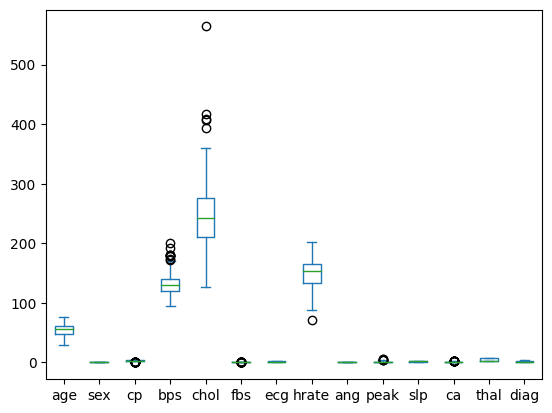

In [12]:
df.plot(kind='box')
plt.show()

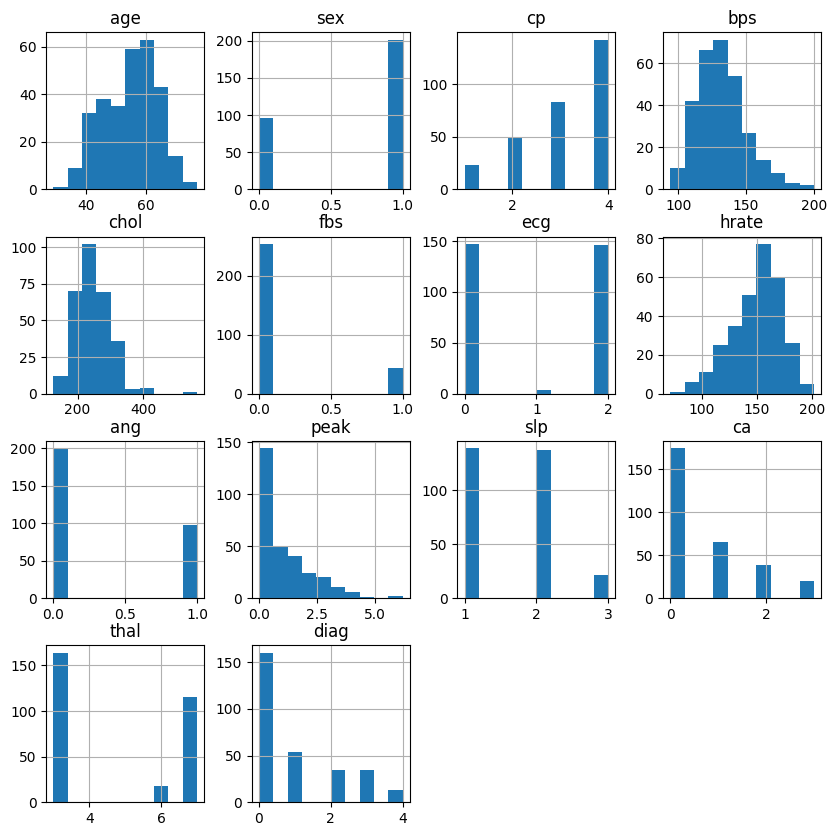

In [13]:
df.hist(figsize=(10,10))
plt.show()

### Machine Learning

### Data Split


In [14]:
array = df.values
array

array([[63.,  1.,  1., ...,  0.,  6.,  0.],
       [67.,  1.,  4., ...,  3.,  3.,  2.],
       [67.,  1.,  4., ...,  2.,  7.,  1.],
       ...,
       [68.,  1.,  4., ...,  2.,  7.,  2.],
       [57.,  1.,  4., ...,  1.,  7.,  3.],
       [57.,  0.,  2., ...,  1.,  3.,  1.]])

In [15]:
X, y = array[:, :-1], array[:, -1]
y

array([0., 2., 1., 0., 0., 0., 3., 0., 2., 1., 0., 0., 2., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 3., 4., 0., 0., 0., 0., 3., 0., 2., 1., 0.,
       0., 0., 3., 1., 3., 0., 4., 0., 0., 0., 1., 4., 0., 4., 0., 0., 0.,
       0., 2., 0., 1., 1., 1., 1., 0., 0., 2., 0., 1., 0., 2., 2., 1., 0.,
       2., 1., 0., 3., 1., 1., 1., 0., 1., 0., 0., 3., 0., 0., 0., 3., 0.,
       0., 0., 0., 0., 0., 3., 0., 0., 0., 1., 2., 3., 0., 0., 0., 0., 0.,
       0., 3., 0., 2., 1., 2., 3., 1., 1., 0., 2., 2., 0., 0., 0., 3., 2.,
       3., 4., 0., 3., 1., 0., 3., 3., 0., 0., 0., 0., 0., 0., 0., 0., 4.,
       3., 1., 0., 0., 1., 0., 1., 0., 1., 4., 0., 0., 0., 0., 0., 0., 4.,
       3., 1., 1., 1., 2., 0., 0., 4., 0., 0., 0., 0., 0., 1., 0., 3., 0.,
       1., 0., 4., 1., 0., 1., 0., 0., 3., 2., 0., 0., 1., 0., 0., 2., 1.,
       2., 0., 3., 2., 0., 3., 0., 0., 0., 1., 0., 0., 0., 0., 0., 3., 3.,
       3., 0., 1., 0., 4., 0., 3., 1., 0., 0., 0., 0., 0., 0., 0., 0., 3.,
       1., 0., 0., 0., 3.

In [16]:
X

array([[63.,  1.,  1., ...,  3.,  0.,  6.],
       [67.,  1.,  4., ...,  2.,  3.,  3.],
       [67.,  1.,  4., ...,  2.,  2.,  7.],
       ...,
       [68.,  1.,  4., ...,  2.,  2.,  7.],
       [57.,  1.,  4., ...,  2.,  1.,  7.],
       [57.,  0.,  2., ...,  2.,  1.,  3.]])

In [17]:
prop = 0.15

In [18]:
seed = 123

In [20]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size=prop, random_state=seed)

In [21]:
X_train

array([[68.,  0.,  3., ...,  2.,  0.,  3.],
       [43.,  0.,  4., ...,  2.,  0.,  7.],
       [58.,  0.,  3., ...,  1.,  0.,  3.],
       ...,
       [54.,  1.,  4., ...,  1.,  0.,  3.],
       [74.,  0.,  2., ...,  1.,  1.,  3.],
       [48.,  1.,  4., ...,  1.,  0.,  3.]])

In [22]:
y_test

array([0., 3., 2., 0., 1., 1., 0., 0., 0., 0., 0., 2., 2., 0., 3., 3., 1.,
       0., 0., 0., 0., 3., 0., 1., 3., 3., 0., 0., 1., 3., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 2.])

In [23]:
y_train

array([0., 2., 0., 0., 2., 0., 2., 1., 0., 3., 2., 4., 1., 0., 0., 0., 2.,
       2., 2., 3., 0., 0., 3., 1., 0., 4., 4., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 1., 0., 0., 0., 2., 0., 0., 4., 0., 0., 1., 0., 1., 0., 3.,
       0., 2., 0., 0., 2., 0., 3., 0., 2., 0., 1., 1., 1., 1., 0., 1., 0.,
       0., 0., 3., 2., 0., 1., 2., 0., 0., 1., 1., 2., 0., 0., 3., 0., 3.,
       3., 0., 0., 1., 0., 2., 2., 0., 0., 0., 0., 0., 1., 2., 0., 0., 0.,
       0., 0., 3., 0., 4., 2., 1., 0., 2., 0., 0., 0., 0., 3., 0., 0., 3.,
       1., 0., 0., 1., 3., 1., 1., 0., 2., 2., 0., 1., 3., 2., 0., 2., 0.,
       0., 4., 4., 3., 4., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 1., 3., 4., 3., 0., 0., 1., 0., 0., 0., 0., 1., 3., 0., 3.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 3., 4., 0., 2.,
       0., 0., 2., 0., 1., 0., 3., 0., 0., 0., 1., 0., 0., 0., 1., 3., 3.,
       1., 0., 0., 0., 1., 0., 1., 0., 2., 0., 0., 0., 0., 2., 1., 3., 1.,
       2., 0., 0., 0., 4.

## Train a Model

In [24]:
param = {'max_depth' : 5}

In [25]:
# Build Decision Trees Classifier 
params = {'max_depth': 5}
classifier = DecisionTreeClassifier(**params)
# classifier = RandomForestClassifier(n_estimators = 100, max_depth = 6)
 
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [26]:
import graphviz

dot_data = tree.export_graphviz(classifier, out_file=None, 
                         feature_names=df.columns[:13], class_names = True,        
                         filled=True, rounded=True, proportion = False,
                         special_characters=True)  
graph = graphviz.Source(dot_data) 

In [27]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'



In [28]:
graph.render()

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [ ]:
sys.path

In [30]:
# Predict the labels of the test data
y_testp = classifier.predict(X_test)
y_testp

array([0., 4., 1., 0., 1., 2., 0., 0., 0., 0., 0., 2., 0., 0., 3., 0., 3.,
       0., 0., 0., 0., 1., 0., 2., 1., 2., 1., 0., 1., 3., 4., 1., 0., 1.,
       0., 1., 0., 0., 3., 2., 1., 0., 0., 0., 4.])

In [35]:
# Calculated the accuracy of the model comparing the observed data and predicted data
print ("Accuracy is ", accuracy_score(y_test,y_testp))

Accuracy is  0.5555555555555556


In [37]:
# Create confusion matrix
confusion_mat = confusion_matrix(y_test,y_testp)
confusion_mat

array([[20,  5,  0,  0,  1],
       [ 1,  2,  3,  2,  0],
       [ 1,  1,  1,  0,  1],
       [ 1,  2,  1,  2,  1],
       [ 0,  0,  0,  0,  0]], dtype=int64)

In [39]:
confusion = pd.crosstab(y_test,y_testp)
confusion

col_0,0.0,1.0,2.0,3.0,4.0
row_0,,,,,
0.0,20,5,0,0,1
1.0,1,2,3,2,0
2.0,1,1,1,0,1
3.0,1,2,1,2,1


In [42]:
conf = pd.crosstab(y_test, y_testp)

In [43]:
conf

col_0,0.0,1.0,2.0,3.0,4.0
row_0,,,,,
0.0,20,5,0,0,1
1.0,1,2,3,2,0
2.0,1,1,1,0,1
3.0,1,2,1,2,1


In [44]:
import seaborn as sns


<AxesSubplot: >

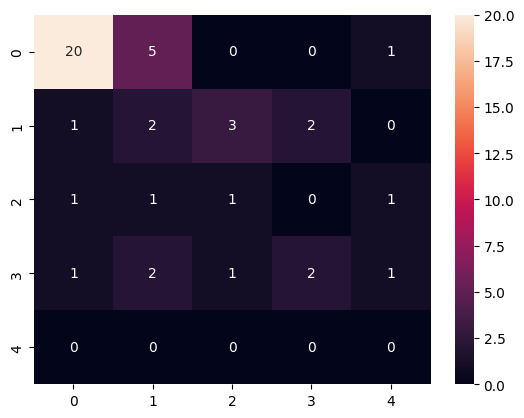

In [51]:
sns.heatmap(confusion_mat, annot=True)

In [53]:
from sklearn.metrics import classification_report


In [55]:
classification_report(y_test, y_testp)

C:\Users\Janus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Janus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Janus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n         0.0       0.87      0.77      0.82        26\n         1.0       0.20      0.25      0.22         8\n         2.0       0.20      0.25      0.22         4\n         3.0       0.50      0.29      0.36         7\n         4.0       0.00      0.00      0.00         0\n\n    accuracy                           0.56        45\n   macro avg       0.35      0.31      0.32        45\nweighted avg       0.63      0.56      0.59        45\n'